In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "synthetic_depression_data.csv"  # Update with the correct path if necessary
data = pd.read_csv(file_path)

# Encode the target variable
label_encoder = LabelEncoder()
data["Depression_Level"] = label_encoder.fit_transform(data["Depression_Level"])

# Prepare input (X) and target (y)
X = data.drop(columns=["Depression_Level", "Total_Score"], errors="ignore")
y = data["Depression_Level"]

# Display dataset overview
print("Dataset Overview:")
print(data.info())
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Question_1        1000 non-null   int64
 1   Question_2        1000 non-null   int64
 2   Question_3        1000 non-null   int64
 3   Question_4        1000 non-null   int64
 4   Question_5        1000 non-null   int64
 5   Question_6        1000 non-null   int64
 6   Question_7        1000 non-null   int64
 7   Question_8        1000 non-null   int64
 8   Question_9        1000 non-null   int64
 9   Question_10       1000 non-null   int64
 10  Total_Score       1000 non-null   int64
 11  Depression_Level  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB
None
   Question_1  Question_2  Question_3  Question_4  Question_5  Question_6  \
0           1           0           0           2           1           1   
1           3           1           0          

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 10)
Testing set size: (200, 10)


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")



Model trained successfully!


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute F1 scores for each class
f1_scores = f1_score(y_test, y_pred, average=None)
print("F1 Scores for each class:", f1_scores)


Accuracy: 0.875
Confusion Matrix:
 [[  0   3   0   0]
 [  0 143   1   0]
 [  0  17  32   0]
 [  0   0   4   0]]
F1 Scores for each class: [0.         0.93159609 0.74418605 0.        ]


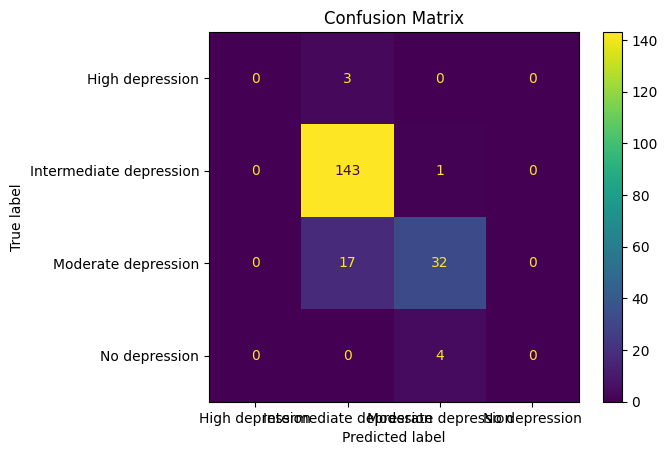

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_).plot()
plt.title("Confusion Matrix")
plt.show()


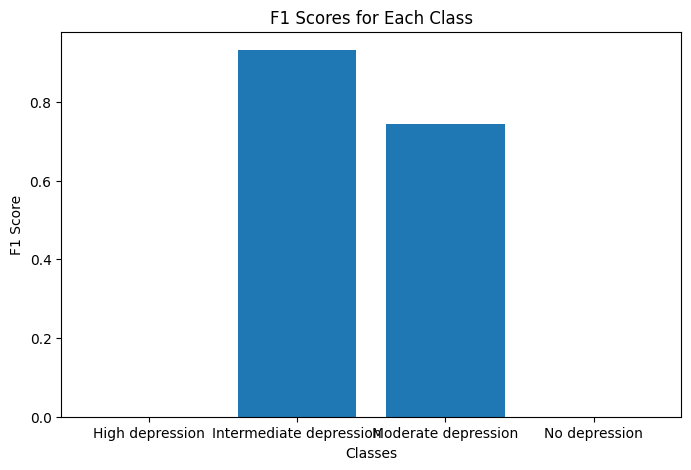

In [7]:
# Plot F1 scores for each class
plt.figure(figsize=(8, 5))
plt.bar(range(len(f1_scores)), f1_scores, tick_label=label_encoder.classes_)
plt.title("F1 Scores for Each Class")
plt.xlabel("Classes")
plt.ylabel("F1 Score")
plt.show()


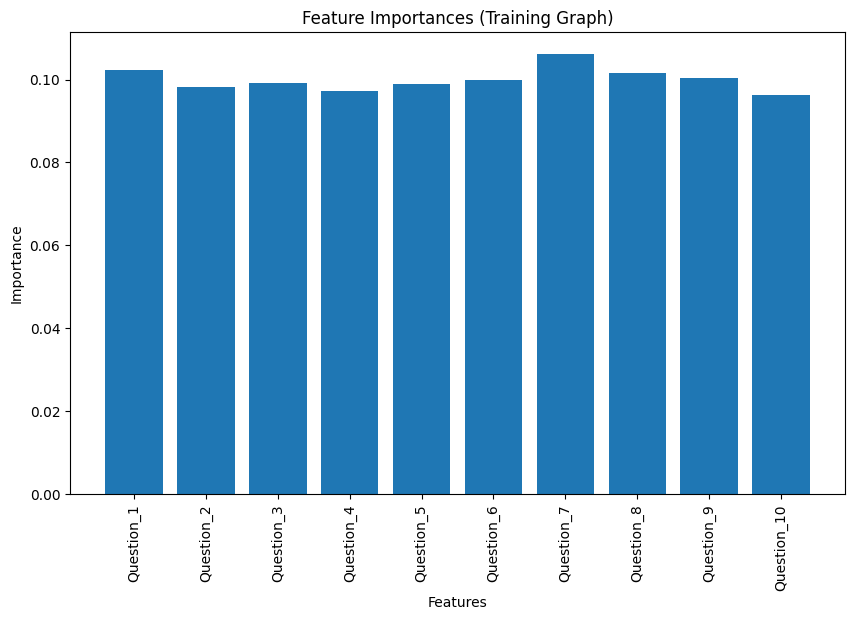

In [8]:
# Plot feature importance
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.title("Feature Importances (Training Graph)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


In [10]:
# Dataset overview
dataset_overview = {
    "Number of Rows": len(data),
    "Number of Features": X.shape[1],
    "Number of Classes": len(label_encoder.classes_),
    "Class Distribution": y.value_counts().to_dict(),
}

# Display dataset overview
overview_df = pd.DataFrame([dataset_overview])
print("Dataset Overview:")
print(overview_df)


Dataset Overview:
   Number of Rows  Number of Features  Number of Classes  \
0            1000                  10                  4   

               Class Distribution  
0  {1: 730, 2: 245, 0: 15, 3: 10}  
